### 導入套件

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta'] # 中文輸出(台北黑體)
%matplotlib inline
import copy
import pickle
import requests # 讀取網頁資料
import bs4
from selenium import webdriver

In [2]:
floder_path = r'.\全國投開票所一覽表\不分區立委'
file_lst = os.listdir(floder_path)
data = []
for filename in file_lst:
    df = pd.read_excel(fr'{floder_path}\{filename}', header=2, index_col=[0, 1]).iloc[3:, :17]
    df.index.names = ['Town', 'Village']
    df.columns = ['vote_ID', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
    df = df[np.invert(df.vote_ID.isna().values)]
    df = df.astype(np.int64)
    city = filename[-9:-6]
    df['City'] = city
    df.set_index(['City', df.index], inplace=True)
    data.append(df)

data = pd.concat(data)

C:\Users\Pool\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\Pool\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\Pool\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\Pool\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\Pool\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no d

In [3]:
data

vote_ID   1   2  3   4  5    6  7   8    9  10  11   12  \
City Town Village                                                            
南投縣  　草屯鎮 玉峰里            1   5   2  3   3  0  233  0  13  288   1   2  146   
          玉峰里            2   7   7  3   5  0  236  1  12  342   2   0  153   
          明正里            3  11   9  5   9  1  334  0  16  384   4   1  208   
          明正里            4  10   6  1   3  0  221  3  14  260   1   2  160   
          明正里            5  10   4  2   3  0  215  2  16  382   1   1  188   
...                    ...  ..  .. ..  .. ..  ... ..  ..  ...  ..  ..  ...   
高雄市  　小港區 鳳興里         2034   6   3  2  15  0  441  0  25  176   3   0  145   
          鳳興里         2035   4  13  2  10  0  430  1  13  165   2   1  145   
          鳳源里         2036   5   5  5   9  0  443  0  15  135   3   1  123   
          鳳源里         2037   3   6  3   4  2  450  0  18  177   2   0  152   
          鳳源里         2038   4   7  2  15  1  412  3   9  150   3   1  129   

                   13  14  15  16  
City Town Village                  
南投縣  　草屯鎮 玉峰里       0   4   0   1  
          玉峰里       0   9   3   2  
          明正里       0   8   0   2  
          明正里       0   5   0   1  
          明正里       1   4   0   2  
...                ..  ..  ..  ..  
高雄市  　小港區 鳳興里       1   1   0   3  
          鳳興里       0   1   0   4  
          鳳源里       0   2   0   3  
          鳳源里       0   7   1   3  
          鳳源里       1   2   1   6  

[17795 rows x 17 columns]

In [4]:
City_lst = ['臺北市', '新北市', '臺中市', '臺南市', '高雄市', '基隆市', '桃園市', '新竹市', '新竹縣', '苗栗縣', '南投縣', '彰化縣', '雲林縣', '嘉義市', '嘉義縣', '屏東縣',  '宜蘭縣', '花蓮縣', '臺東縣', '澎湖縣', '連江縣', '金門縣']

TW_vote = data.loc[:, [1, 6, 8, 9, 12]].groupby('City').sum().loc[City_lst].copy()
columns = ['小歐盟', '民進黨', '時代力量', '國民黨', '民眾黨']
TW_vote.columns = columns
c_lst = ['#be1b74', '#1B9431', '#F9BE01', '#000095', '#28C8C8'] # 色碼

TW_vote

,小歐盟,民進黨,時代力量,國民黨,民眾黨
City,,,,,
臺北市,13828,511126,43243,575004,334389
新北市,24989,846766,63162,854558,556980
臺中市,16267,568839,46589,576758,416866
臺南市,10435,508784,27629,296987,214469
高雄市,15714,728109,36419,496423,283062
基隆市,2063,67018,4984,85320,48401
桃園市,14517,429373,32262,475063,338329
新竹市,2344,79721,12212,83499,77496
新竹縣,3099,79315,13186,132160,96734


In [5]:
arr = TW_vote.values.T
arr = arr / arr.sum(0) * 100

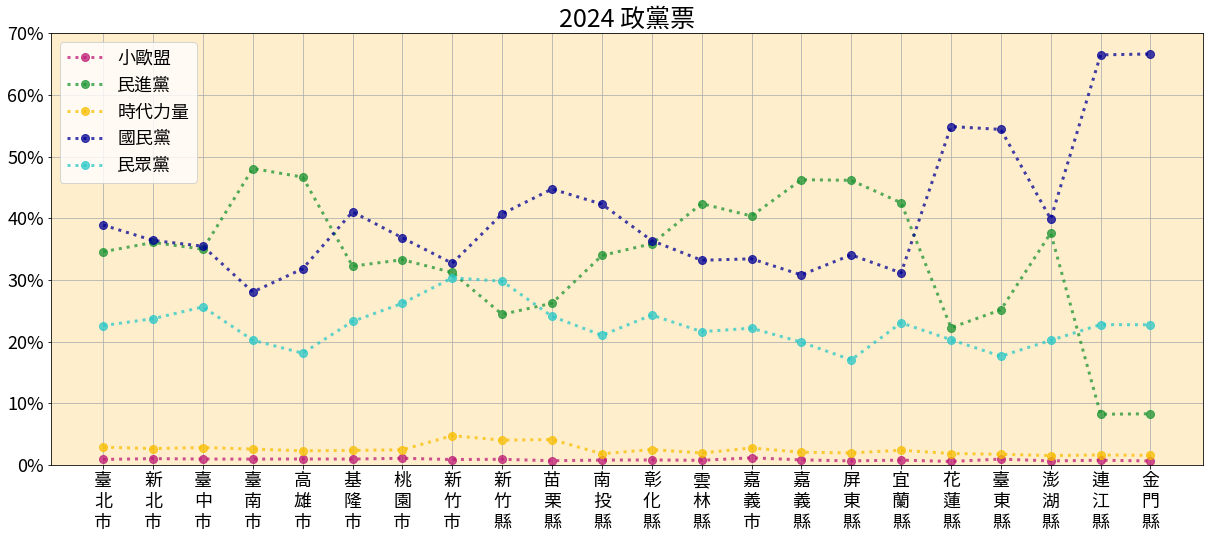

In [6]:
fig = plt.figure(figsize=(16, 6))
ax = fig.add_axes([0, 0, 1, 1], facecolor='#ffeecc')

for i in range(5):
    ax.plot(arr[i], 'o:', c=c_lst[i], ms=8, lw=3, alpha=0.75, label=TW_vote.columns[i])
    
xticks = list(TW_vote.index.str[-3]  + '\n' + TW_vote.index.str[-2] + '\n' + TW_vote.index.str[-1])
plt.xticks(range(22), xticks, fontsize=18, horizontalalignment='center')
plt.yticks(range(0, 71, 10), [str(s)+'%' for s in range(0, 71, 10)], fontsize=18)
plt.ylim([0, 70])
plt.title('2024 政黨票', fontsize=25)
ax.grid(True)
plt.legend(loc=2, fontsize=18)



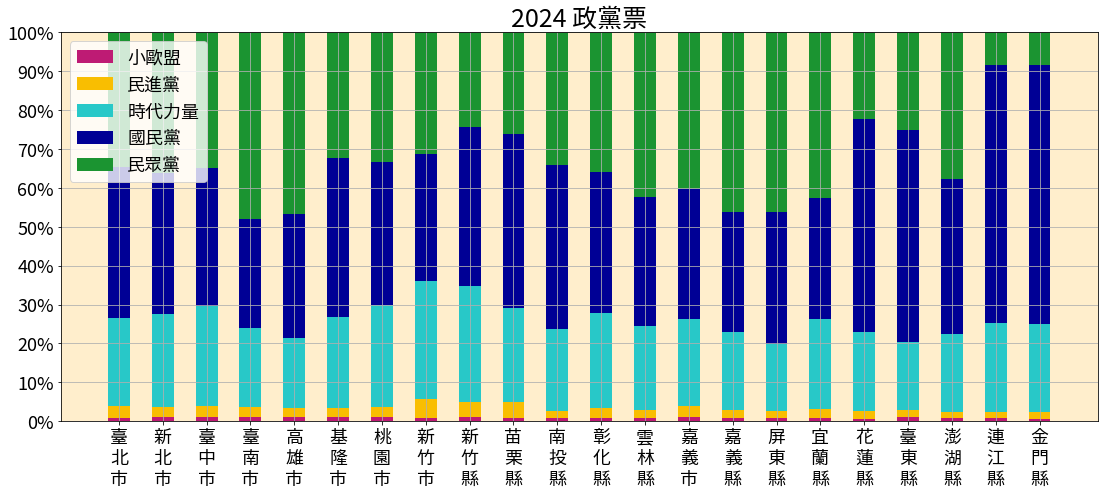

In [7]:
sort = [0, 2, 4, 3, 1] # 重新排列政黨
arrsort = arr[sort]

fig = plt.figure(figsize=(16, 6))
ax = fig.add_axes([0.05, 0.05, 0.9, 0.9], facecolor='#ffeecc')

for i in range(5):
    ax.bar(np.arange(22), arrsort[i], 0.5,  yerr=np.zeros(22), color=c_lst[sort[i]],  bottom=arrsort[0:i, :].sum(0), label=columns[i])
    
xticks = list(TW_vote.index.str[-3]  + '\n' + TW_vote.index.str[-2] + '\n' + TW_vote.index.str[-1])
plt.xticks(range(22), xticks, fontsize=18, horizontalalignment='center')
plt.yticks(range(0, 101, 10), [str(s)+'%' for s in range(0, 101, 10)], fontsize=18)
plt.ylim([0, 100])
plt.title('2024 政黨票', fontsize=25)
ax.grid(True)
plt.legend(loc=2, fontsize=18)